In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("Kolkata-1973-2024-cleaned.csv", parse_dates=['DATE'], index_col='DATE')
data

,DEWP,MAX,MIN,MXSPD,PRCP,TEMP,VISIB,WDSP,Fog,Rain,Snow,Hail,Thunder,Tornado
DATE,,,,,,,,,,,,,,
1973-01-01,66.0,28.000000,19.000000,2.9,0.0,23.611111,1.7,0.6,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-02,56.2,26.000000,15.000000,7.0,0.0,20.777778,2.1,1.9,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-03,54.9,26.000000,14.000000,4.9,0.0,20.000000,2.7,1.5,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-04,51.1,28.000000,12.000000,4.9,0.0,20.111111,2.8,0.9,0.0,0.0,0.0,0.0,0.0,0.0
1973-01-05,54.5,27.000000,11.000000,8.0,0.0,21.333333,2.1,1.8,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08,71.5,32.000000,22.777778,7.0,0.0,27.222222,2.1,4.7,0.0,0.0,0.0,0.0,0.0,0.0
2024-11-09,70.7,31.611111,23.000000,7.0,0.0,27.055556,2.3,3.8,0.0,0.0,0.0,0.0,0.0,0.0
2024-11-10,68.2,31.777778,21.388889,9.9,0.0,26.944444,2.2,4.3,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data.describe()

,DEWP,MAX,MIN,MXSPD,PRCP,TEMP,VISIB,WDSP,Fog,Rain,Snow,Hail,Thunder,Tornado
count,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.00000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,70.271915,31.832659,21.880585,7.444046,3.925804,26.437762,1.91003,3.422076,0.096442,0.291543,0.000845,0.001689,0.200591,0.000528
std,9.639887,3.942072,5.301742,4.170536,13.637699,4.329855,0.71523,2.339775,0.295204,0.454485,0.029050,0.041066,0.400453,0.022970
min,40.700000,15.777778,5.000000,1.000000,0.000000,12.555556,0.40000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.200000,29.000000,18.000000,4.900000,0.000000,23.444444,1.40000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.300000,32.388889,24.000000,7.000000,0.000000,27.833333,1.80000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.400000,34.722222,26.000000,9.900000,0.762000,29.611111,2.20000,4.641667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,86.400000,47.000000,31.000000,50.900000,383.032000,36.000000,11.00000,27.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18944 entries, 1973-01-01 to 2024-11-12
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEWP     18944 non-null  float64
 1   MAX      18944 non-null  float64
 2   MIN      18944 non-null  float64
 3   MXSPD    18944 non-null  float64
 4   PRCP     18944 non-null  float64
 5   TEMP     18944 non-null  float64
 6   VISIB    18944 non-null  float64
 7   WDSP     18944 non-null  float64
 8   Fog      18944 non-null  float64
 9   Rain     18944 non-null  float64
 10  Snow     18944 non-null  float64
 11  Hail     18944 non-null  float64
 12  Thunder  18944 non-null  float64
 13  Tornado  18944 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [47]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day of Month'] = data.index.day
month_counts = data[(data['Day of Month'] == 1)]['Month'].value_counts().sort_index()

# Aggregate data monthly
monthly_summary = data.groupby('Month').agg({
    'MAX': ['max'],             # Maximum temperature
    'MIN': ['min'],             # Minimum temperature
    'TEMP': ['mean'],           # Average temperature
    'PRCP': ['sum'],            # Total rainfall
    'Rain': lambda x: (x > 0).sum()  # Total rainy days
})

# Adjust rainfall and rainy days by occurrences
monthly_summary[('PRCP', 'sum')] /= month_counts
monthly_summary[('Rain', '<lambda>')] /= month_counts

# Rename columns for clarity
monthly_summary.columns = ['Max Temp (°C)', 'Min Temp (°C)', 'Avg Temp (°C)', 
                           'Avg Rainfall (mm)', 'Avg Rainy Days']

overall_totals = pd.DataFrame({
    'Max Temp (°C)': [monthly_summary['Max Temp (°C)'].max()],
    'Min Temp (°C)': [monthly_summary['Min Temp (°C)'].min()],
    'Avg Temp (°C)': [monthly_summary['Avg Temp (°C)'].mean()],
    'Avg Rainfall (mm)': [monthly_summary['Avg Rainfall (mm)'].sum()],  # Overall avg rainfall
    'Avg Rainy Days': [monthly_summary['Avg Rainy Days'].sum()]  # Overall avg rainy days
}, index=['Overall'])

# Append the overall totals to the monthly summary
final_summary = pd.concat([monthly_summary, overall_totals]).T

final_summary

,1,2,3,4,5,6,7,8,9,10,11,12,Overall
Max Temp (°C),33.000000,39.388889,43.000000,43.000000,47.000000,44.000000,39.222222,39.611111,43.000000,39.611111,38.000000,32.222222,47.000000
Min Temp (°C),6.611111,7.000000,11.000000,15.777778,12.000000,16.000000,12.888889,16.888889,17.777778,12.000000,8.000000,5.000000,5.000000
Avg Temp (°C),18.835832,22.597232,27.103529,29.858209,30.277571,29.911806,29.032672,28.942721,28.763283,27.716484,24.192985,19.751493,26.415318
Avg Rainfall (mm),12.299462,26.091173,28.200513,44.463026,124.132731,238.928170,281.737637,280.278824,236.776032,113.446413,29.104981,15.030824,1430.489785
Avg Rainy Days,1.884615,2.365385,3.519231,5.211538,9.096154,15.423077,20.557692,19.903846,16.346154,8.961538,1.846154,1.117647,106.233032


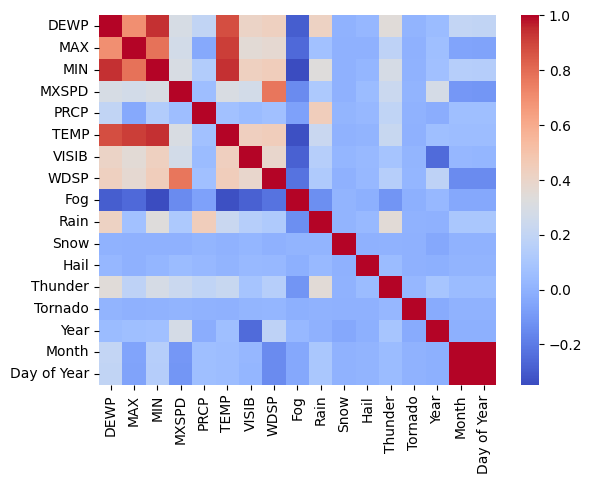

In [59]:
data['Day of Year'] = data.index.day_of_year
data.drop(columns=['Day of Month'], inplace=True)
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=False)